In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import LearningRateScheduler, TensorBoard
import matplotlib.pyplot as plt
import warnings

# Make NumPy printouts easier to read.
np.set_printoptions(precision=5, suppress=True)
warnings.filterwarnings("ignore")

print(tf.__version__)

2.10.0


In [7]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [8]:
def custom_scheduler(epoch, lr):
    if epoch < 4:
        return lr
    else:
        return lr * tf.math.exp(-0.1)


def build_and_compile_model_input(k):
      model = tf.keras.models.Sequential([
          tf.keras.layers.Dense(512, activation='relu', input_shape=(k,)),
          tf.keras.layers.Dense(256, activation='relu'),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(1,activation='linear') 
    ])

      model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
                    loss="mse",
                    metrics=['mae'])
      return model

scheduler = LearningRateScheduler(custom_scheduler)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1)
callbacks = [scheduler, tensorboard]

EPOCHS = 40
BATCH_SIZE=64

DATASET=pd.read_csv('../dane_scalone.csv')


In [9]:
DATASET

,Pora_roku,Dzien_tygodnia,Czas_dnia,Przeplyw
0,2.0,1.0,0.000000,0.0
1,2.0,1.0,0.000694,0.0
2,2.0,1.0,0.001389,0.0
3,2.0,1.0,0.002083,0.0
4,2.0,1.0,0.002778,0.0
...,...,...,...,...
12418555,1.0,7.0,0.996528,0.0
12418556,1.0,7.0,0.997222,0.0
12418557,1.0,7.0,0.997917,0.0
12418558,1.0,7.0,0.998611,0.0


# MODEL A 
INPUT(dzień tygodnia, pora dnia) OUTPUT(przepływ)

In [10]:
dataset = DATASET
dataset=dataset.drop(columns="Pora_roku")
dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model =build_and_compile_model_input(2)
model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=callbacks)
model.save("Modele/Całość/model_a")

Epoch 1/20
155232/155232 [==============================] - 280s 2ms/step - loss: 0.7016 - mae: 0.1647 - lr: 0.0010
Epoch 2/20
155232/155232 [==============================] - 275s 2ms/step - loss: 0.7020 - mae: 0.1650 - lr: 0.0010
Epoch 3/20
155232/155232 [==============================] - 273s 2ms/step - loss: 0.7035 - mae: 0.1648 - lr: 0.0010
Epoch 4/20
155232/155232 [==============================] - 269s 2ms/step - loss: 0.7044 - mae: 0.1642 - lr: 0.0010
Epoch 5/20
155232/155232 [==============================] - 269s 2ms/step - loss: 0.7044 - mae: 0.1642 - lr: 9.0484e-04
Epoch 6/20
155232/155232 [==============================] - 276s 2ms/step - loss: 0.7044 - mae: 0.1642 - lr: 8.1873e-04
Epoch 7/20
155232/155232 [==============================] - 277s 2ms/step - loss: 0.7044 - mae: 0.1642 - lr: 7.4082e-04
Epoch 8/20
155232/155232 [==============================] - 275s 2ms/step - loss: 0.7045 - mae: 0.1642 - lr: 6.7032e-04
Epoch 9/20
155232/155232 [==============================

In [11]:
model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)

38808/38808 [==============================] - 48s 1ms/step - loss: 0.7077 - mae: 0.1620


[0.7076985836029053, 0.1619694083929062]

45/45 [==============================] - 0s 844us/step


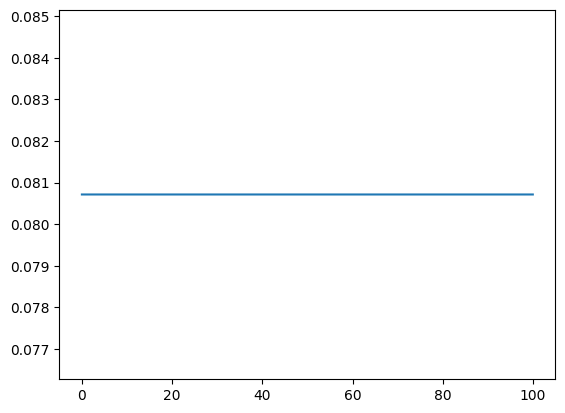

In [12]:
flow_time_plot=np.arange(0,100,100/1440) 
flow_time=np.vstack((1*np.ones_like(flow_time_plot, dtype=int),flow_time_plot)).T
flow_result = model.predict(flow_time)

plt.plot(flow_time_plot, flow_result)

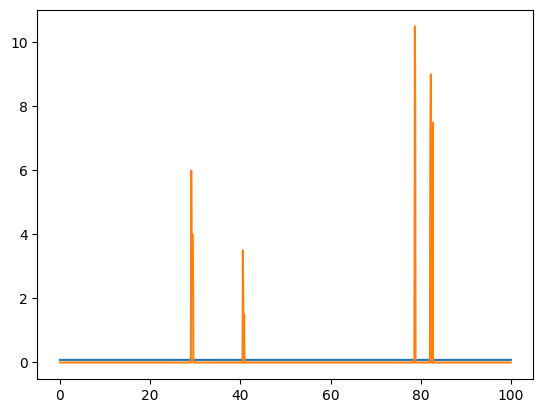

In [13]:
plt.plot(flow_time_plot, flow_result)
plt.plot(flow_time_plot, DATASET.Przeplyw.iloc[0:1440])

39/45 [=========================>....] - ETA: 0s

45/45 [==============================] - 0s 977us/step


(0.0, 100.0)

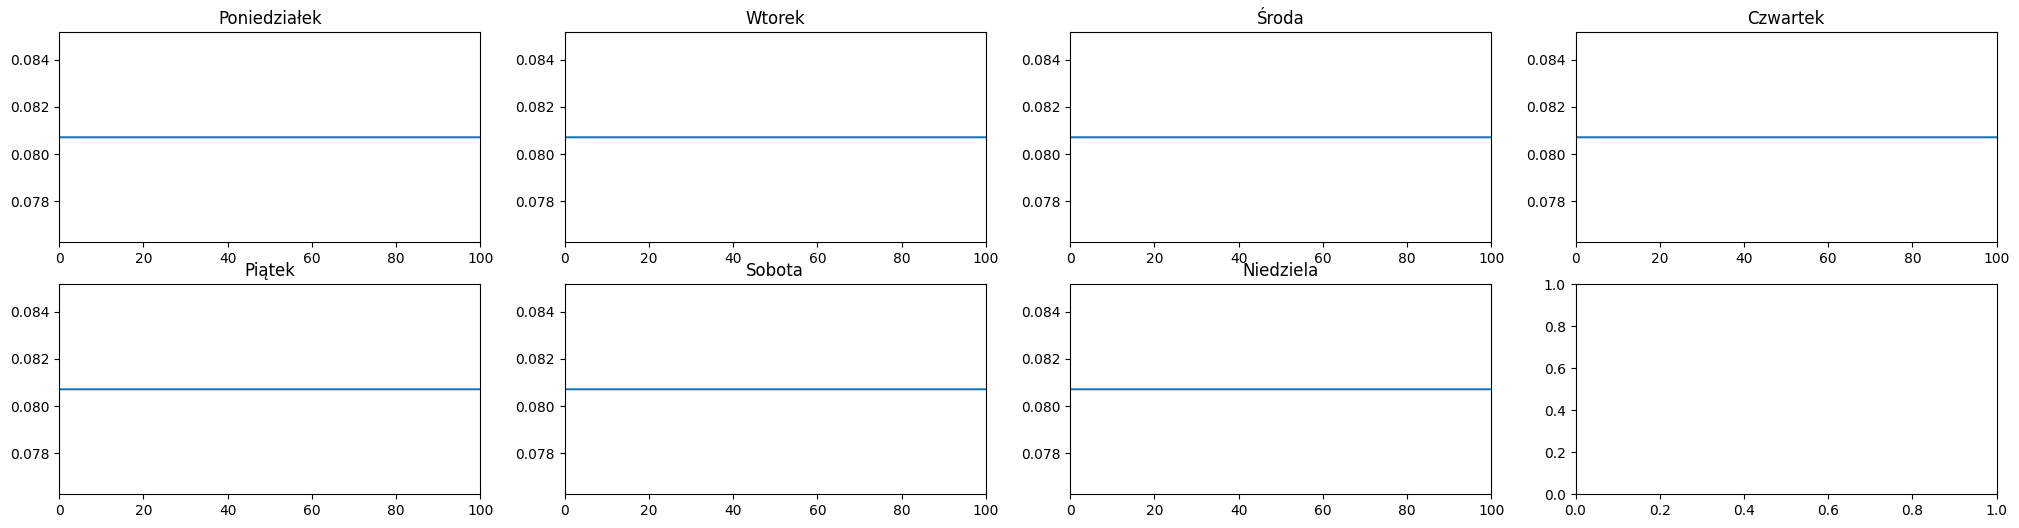

In [14]:
flow_time_plot=np.arange(0,100,100/1440) 
flow_time=np.vstack((1*np.ones_like(flow_time_plot, dtype=int),flow_time_plot)).T
flow_result_pon = model.predict(flow_time)

flow_time_plot=np.arange(0,100,100/1440) 
flow_time=np.vstack((2*np.ones_like(flow_time_plot, dtype=int),flow_time_plot)).T
flow_result_wt = model.predict(flow_time)

flow_time_plot=np.arange(0,100,100/1440) 
flow_time=np.vstack((3*np.ones_like(flow_time_plot, dtype=int),flow_time_plot)).T
flow_result_sr = model.predict(flow_time)

flow_time_plot=np.arange(0,100,100/1440) 
flow_time=np.vstack((4*np.ones_like(flow_time_plot, dtype=int),flow_time_plot)).T
flow_result_czw = model.predict(flow_time)

flow_time_plot=np.arange(0,100,100/1440) 
flow_time=np.vstack((5*np.ones_like(flow_time_plot, dtype=int),flow_time_plot)).T
flow_result_pt = model.predict(flow_time)

flow_time_plot=np.arange(0,100,100/1440) 
flow_time=np.vstack((6*np.ones_like(flow_time_plot, dtype=int),flow_time_plot)).T
flow_result_sob = model.predict(flow_time)

flow_time_plot=np.arange(0,100,100/1440) 
flow_time=np.vstack((7*np.ones_like(flow_time_plot, dtype=int),flow_time_plot)).T
flow_result_nd = model.predict(flow_time)

fig, axs = plt.subplots(2, 4, figsize=(25, 6))

axs[0,0].plot(flow_time_plot, flow_result_pon.reshape(1440))
axs[0,0].set_title('Poniedziałek')
axs[0,0].set_xlim(0, 100)

axs[0,1].plot(flow_time_plot, flow_result_wt.reshape(1440))
axs[0,1].set_title('Wtorek')
axs[0,1].set_xlim(0, 100)

axs[0,2].plot(flow_time_plot, flow_result_sr.reshape(1440))
axs[0,2].set_title('Środa')
axs[0,2].set_xlim(0, 100)

axs[0,3].plot(flow_time_plot, flow_result_czw.reshape(1440))
axs[0,3].set_title('Czwartek')
axs[0,3].set_xlim(0, 100)

axs[1,0].plot(flow_time_plot, flow_result_pt.reshape(1440))
axs[1,0].set_title('Piątek')
axs[1,0].set_xlim(0, 100)

axs[1,1].plot(flow_time_plot, flow_result_sob.reshape(1440))
axs[1,1].set_title('Sobota')
axs[1,1].set_xlim(0, 100)

axs[1,2].plot(flow_time_plot, flow_result_nd.reshape(1440))
axs[1,2].set_title('Niedziela')
axs[1,2].set_xlim(0, 100)


# MODEL B 
INPUT(pora dnia) OUTPUT(przepływ)


In [15]:
def prep_data(data,day):
      data=data.drop(columns="Pora_roku")
      data = data[data['Dzien_tygodnia'] == day]

      data['Czas_dnia'] = data['Czas_dnia'] * 100
      x=data.drop(columns="Przeplyw")
      x=x.drop(columns="Dzien_tygodnia")
      y=data.drop(columns="Dzien_tygodnia")
      y=y.drop(columns="Czas_dnia")
      return [x,y]

Uczenie modelu przy wykorzystaniu tylko informacji o przepłwie w danej chwili czasu bez labelu o dniu tygodnia, zostały uzyte wszyski dni tygodnia

In [16]:
dataset = DATASET
dataset=dataset.drop(columns="Pora_roku")
dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
x=x.drop(columns="Dzien_tygodnia")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model =build_and_compile_model_input(1)
model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,callbacks=callbacks)
model.save("Modele/Całość/model_b")

Epoch 1/20
155232/155232 [==============================] - 281s 2ms/step - loss: 0.6958 - mae: 0.1654 - lr: 0.0010
Epoch 2/20
155232/155232 [==============================] - 279s 2ms/step - loss: 0.6918 - mae: 0.1647 - lr: 0.0010
Epoch 3/20
155232/155232 [==============================] - 283s 2ms/step - loss: 0.6907 - mae: 0.1625 - lr: 0.0010
Epoch 4/20
155232/155232 [==============================] - 282s 2ms/step - loss: 0.6903 - mae: 0.1618 - lr: 0.0010
Epoch 5/20
155232/155232 [==============================] - 278s 2ms/step - loss: 0.6901 - mae: 0.1618 - lr: 9.0484e-04
Epoch 6/20
155232/155232 [==============================] - 280s 2ms/step - loss: 0.6898 - mae: 0.1620 - lr: 8.1873e-04
Epoch 7/20
155232/155232 [==============================] - 280s 2ms/step - loss: 0.6896 - mae: 0.1615 - lr: 7.4082e-04
Epoch 8/20
155232/155232 [==============================] - 280s 2ms/step - loss: 0.6895 - mae: 0.1614 - lr: 6.7032e-04
Epoch 9/20
155232/155232 [==============================

45/45 [==============================] - 0s 796us/step


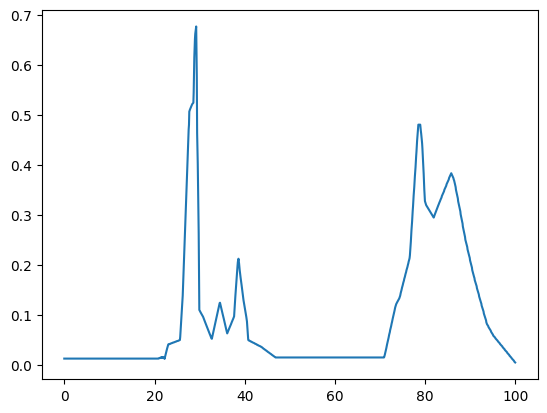

In [17]:
flow_time_plot=np.arange(0,100,100/1440) 
flow_result = model.predict(flow_time_plot)

plt.plot(flow_time_plot, flow_result)

## PORÓWNIANIE DNI TYGODNIA

Uczenie modelu danymi tylko z jednego dnia tygodnia

In [18]:
dataset = DATASET
[x,y]=prep_data(dataset,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_pon = build_and_compile_model_input(1)
model_pon.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=callbacks)
flow_time_pon=np.arange(0,100,100/1440) 
flow_result_pon = model_pon.predict(flow_time_pon).T
# plt.plot(flow_time_pon, flow_result_pon.reshape(1440))


dataset = DATASET
[x,y]=prep_data(dataset,2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_wt = build_and_compile_model_input(1)
model_wt.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=callbacks)
flow_time_wt=np.arange(0,100,100/1440) 
flow_result_wt = model_wt.predict(flow_time_wt)
# plt.plot(flow_time_wt, flow_result_wt.reshape(1440))

dataset = DATASET
[x,y]=prep_data(dataset,3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_sr = build_and_compile_model_input(1)
model_sr.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=callbacks)
flow_time_sr=np.arange(0,100,100/1440)  
flow_result_sr = model_sr.predict(flow_time_sr)   
# plt.plot(flow_time_sr, flow_result_sr.reshape(1440))

dataset = DATASET
[x,y]=prep_data(dataset,4)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_czw = build_and_compile_model_input(1)
model_czw.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=callbacks)
flow_time_czw=np.arange(0,100,100/1440) 
flow_result_czw = model_czw.predict(flow_time_czw)   
# plt.plot(flow_time_czw, flow_result_czw.reshape(1440))

dataset = DATASET
[x,y]=prep_data(dataset,5)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_pt = build_and_compile_model_input(1)
model_pt.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=callbacks)
flow_time_pt=np.arange(0,100,100/1440)  
flow_result_pt = model_pt.predict(flow_time_pt)   
# plt.plot(flow_time_pt, flow_result_pt.reshape(1440))


dataset = DATASET
[x,y]=prep_data(dataset,6)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_sob = build_and_compile_model_input(1)
model_sob.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=callbacks)
flow_time_sob=np.arange(0,100,100/1440) 
flow_result_sob = model_sob.predict(flow_time_sob)   
# plt.plot(flow_time_sob, flow_result_sob.reshape(1440))


dataset = DATASET
[x,y]=prep_data(dataset,7)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_nd = build_and_compile_model_input(1)
model_nd.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=callbacks)
flow_time_nd=np.arange(0,100,100/1440) 
flow_result_nd = model_nd.predict(flow_time_nd)   
# plt.plot(flow_time_nd, flow_result_nd.reshape(1440))

Epoch 1/20
22176/22176 [==============================] - 41s 2ms/step - loss: 0.8260 - mae: 0.1867 - lr: 0.0010
Epoch 2/20
22176/22176 [==============================] - 40s 2ms/step - loss: 0.8174 - mae: 0.1864 - lr: 0.0010
Epoch 3/20
22176/22176 [==============================] - 41s 2ms/step - loss: 0.8125 - mae: 0.1869 - lr: 0.0010
Epoch 4/20
22176/22176 [==============================] - 40s 2ms/step - loss: 0.8100 - mae: 0.1855 - lr: 0.0010
Epoch 5/20
22176/22176 [==============================] - 40s 2ms/step - loss: 0.8088 - mae: 0.1852 - lr: 9.0484e-04
Epoch 6/20
22176/22176 [==============================] - 40s 2ms/step - loss: 0.8082 - mae: 0.1841 - lr: 8.1873e-04
Epoch 7/20
22176/22176 [==============================] - 40s 2ms/step - loss: 0.8074 - mae: 0.1835 - lr: 7.4082e-04
Epoch 8/20
22176/22176 [==============================] - 40s 2ms/step - loss: 0.8067 - mae: 0.1826 - lr: 6.7032e-04
Epoch 9/20
22176/22176 [==============================] - 40s 2ms/step - loss: 0

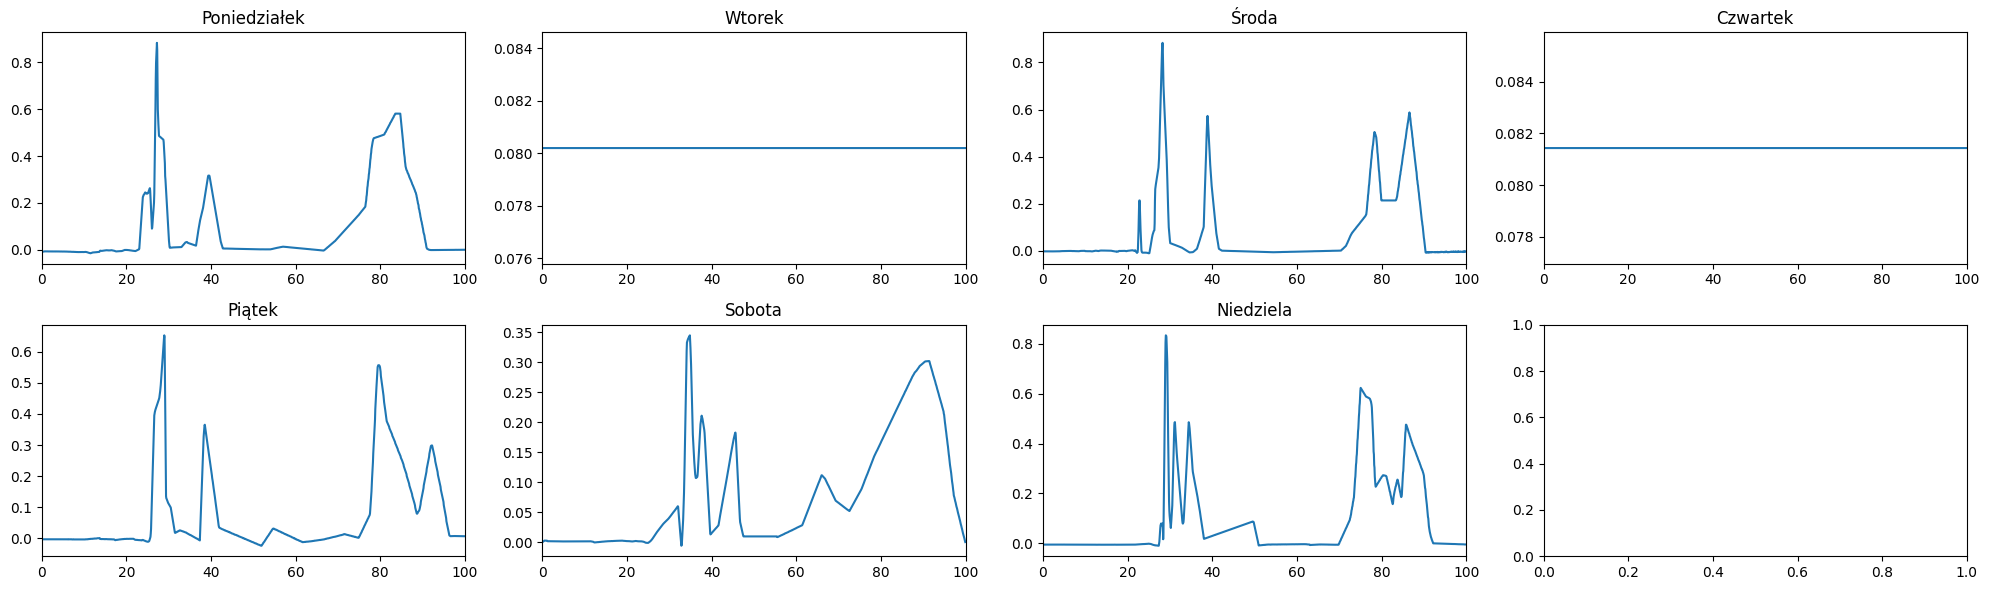

In [19]:
fig, axs = plt.subplots(2, 4, figsize=(20, 6))


axs[0,0].plot(flow_time_pon, flow_result_pon.reshape(1440))
axs[0,0].set_title('Poniedziałek')
axs[0,0].set_xlim(0, 100)

axs[0,1].plot(flow_time_wt, flow_result_wt.reshape(1440))
axs[0,1].set_title('Wtorek')
axs[0,1].set_xlim(0, 100)

axs[0,2].plot(flow_time_sr, flow_result_sr.reshape(1440))
axs[0,2].set_title('Środa')
axs[0,2].set_xlim(0, 100)

axs[0,3].plot(flow_time_czw, flow_result_czw.reshape(1440))
axs[0,3].set_title('Czwartek')
axs[0,3].set_xlim(0, 100)

axs[1,0].plot(flow_time_pt, flow_result_pt.reshape(1440))
axs[1,0].set_title('Piątek')
axs[1,0].set_xlim(0, 100)

axs[1,1].plot(flow_time_sob, flow_result_sob.reshape(1440))
axs[1,1].set_title('Sobota')
axs[1,1].set_xlim(0, 100)

axs[1,2].plot(flow_time_nd, flow_result_nd.reshape(1440))
axs[1,2].set_title('Niedziela')
axs[1,2].set_xlim(0, 100)

plt.tight_layout()

plt.show()

# MODEL C 
INPUT(pora roku, dzień tygodnia, pora dnia) OUTPUT(przepływ)

In [20]:
dataset = DATASET

dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")
y=y.drop(columns="Pora_roku")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = build_and_compile_model_input(3)
model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=callbacks)

model.save("Modele/Całość/model_c")

Epoch 1/20
155232/155232 [==============================] - 285s 2ms/step - loss: 0.7005 - mae: 0.1665 - lr: 0.0010
Epoch 2/20
155232/155232 [==============================] - 282s 2ms/step - loss: 0.6979 - mae: 0.1680 - lr: 0.0010
Epoch 3/20
155232/155232 [==============================] - 285s 2ms/step - loss: 0.6936 - mae: 0.1698 - lr: 0.0010
Epoch 4/20
155232/155232 [==============================] - 283s 2ms/step - loss: 0.6895 - mae: 0.1697 - lr: 0.0010
Epoch 5/20
155232/155232 [==============================] - 283s 2ms/step - loss: 0.6882 - mae: 0.1691 - lr: 9.0484e-04
Epoch 6/20
155232/155232 [==============================] - 284s 2ms/step - loss: 0.6874 - mae: 0.1674 - lr: 8.1873e-04
Epoch 7/20
155232/155232 [==============================] - 282s 2ms/step - loss: 0.6865 - mae: 0.1678 - lr: 7.4082e-04
Epoch 8/20
155232/155232 [==============================] - 283s 2ms/step - loss: 0.6851 - mae: 0.1669 - lr: 6.7032e-04
Epoch 9/20
155232/155232 [==============================

In [21]:
dni_tygodnia = {
    1: 'Poniedziałek',
    2: 'Wtorek',
    3: 'Środa',
    4: 'Czwartek',
    5: 'Piątek',
    6: 'Sobota',
    7: 'Niedziela'
}

45/45 [==============================] - 0s 1ms/step


45/45 [==============================] - 0s 881us/step


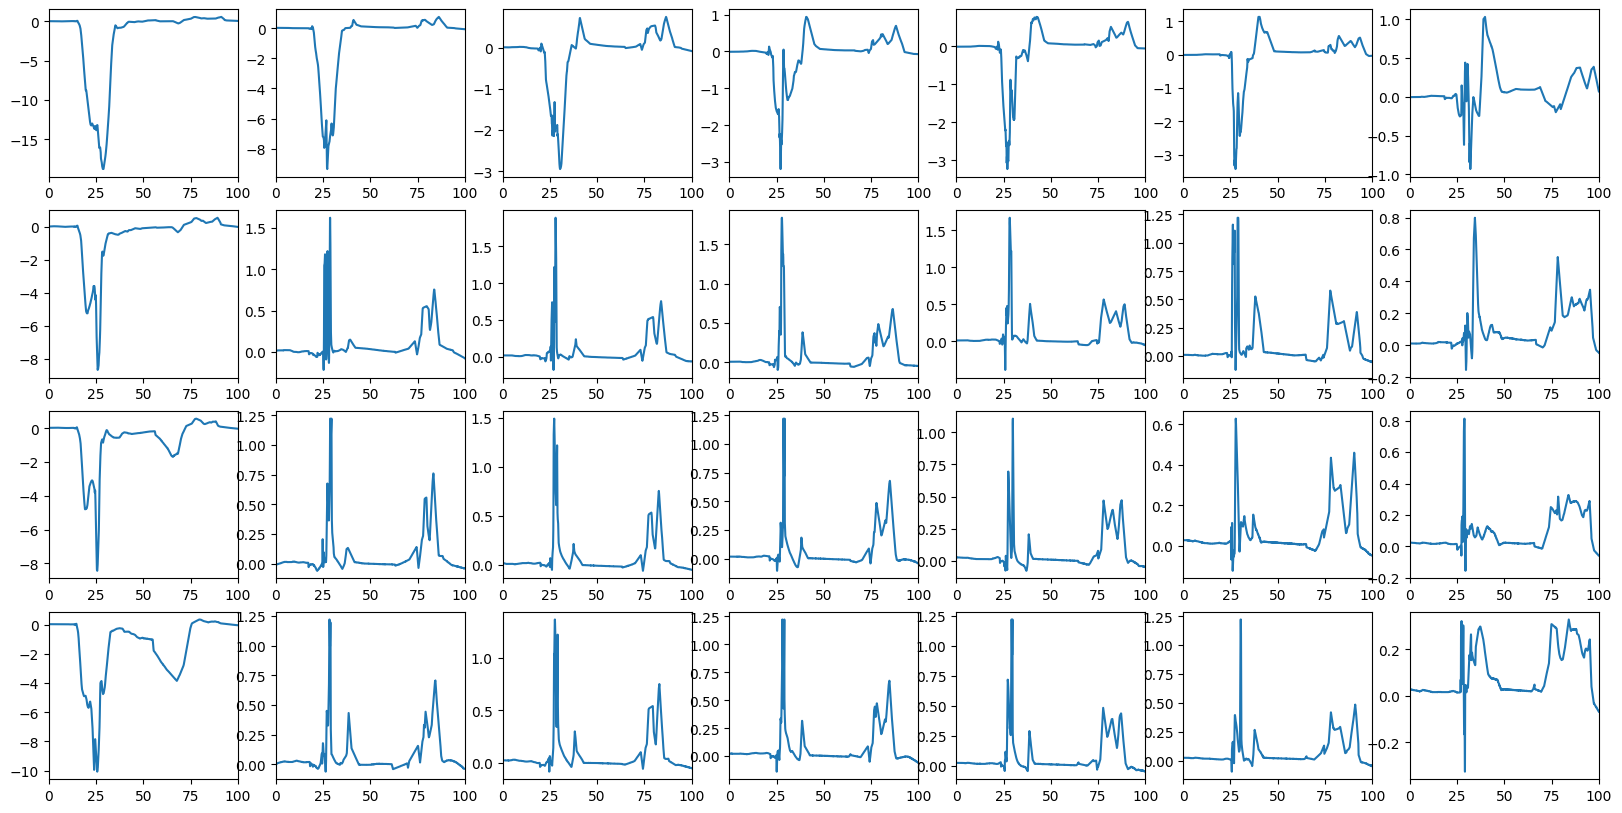

In [22]:
flow_time_plot=np.arange(0,100,100/1440) 
fig, axs = plt.subplots(4, 7, figsize=(20, 10))
for i in range(7):
    for j in range(4):
        flow_time=np.vstack((j*np.ones_like(flow_time_plot, dtype=int),i*np.ones_like(flow_time_plot, dtype=int),flow_time_plot)).T
        flow_result = model.predict(flow_time) 
        axs[j,i].plot(flow_time_plot, flow_result)
        axs[j,i].set_xlim(0, 100)
        # axs[j,i].set_title(dni_tygodnia[i])

# MODEL D 
INPUT(pora roku, pora dnia) OUTPUT(przepływ)

In [23]:
def prep_data(data):
      data['Czas_dnia'] = data['Czas_dnia'] * 100
      x=data.drop(columns="Przeplyw")
      x=x.drop(columns="Dzien_tygodnia")
      y=data.drop(columns="Dzien_tygodnia")
      y=y.drop(columns="Czas_dnia")
      y=y.drop(columns="Pora_roku")
      return [x,y]

In [24]:
dataset = DATASET

[x,y]=prep_data(dataset)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = build_and_compile_model_input(2)
model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=callbacks)

model.save("Modele/Całość/model_d")

Epoch 1/20
155232/155232 [==============================] - 274s 2ms/step - loss: 1.7559 - mae: 0.2147 - lr: 0.0010
Epoch 2/20
155232/155232 [==============================] - 273s 2ms/step - loss: 0.7044 - mae: 0.1642 - lr: 0.0010
Epoch 3/20
155232/155232 [==============================] - 267s 2ms/step - loss: 0.7044 - mae: 0.1642 - lr: 0.0010
Epoch 4/20
155232/155232 [==============================] - 266s 2ms/step - loss: 0.7044 - mae: 0.1642 - lr: 0.0010
Epoch 5/20
155232/155232 [==============================] - 267s 2ms/step - loss: 0.7044 - mae: 0.1642 - lr: 9.0484e-04
Epoch 6/20
155232/155232 [==============================] - 270s 2ms/step - loss: 0.7044 - mae: 0.1642 - lr: 8.1873e-04
Epoch 7/20
155232/155232 [==============================] - 267s 2ms/step - loss: 0.7044 - mae: 0.1642 - lr: 7.4082e-04
Epoch 8/20
155232/155232 [==============================] - 269s 2ms/step - loss: 0.7045 - mae: 0.1642 - lr: 6.7032e-04
Epoch 9/20
155232/155232 [==============================

In [25]:
flow_time_plot=np.arange(0,100,100/1440) 

flow_result_spring=np.vstack((1*np.ones_like(flow_time_plot, dtype=int),flow_time_plot)).T
flow_result_spring = model.predict(flow_result_spring)  

flow_result_summer=np.vstack((2*np.ones_like(flow_time_plot, dtype=int),flow_time_plot)).T
flow_result_summer = model.predict(flow_result_summer)  

flow_result_fall=np.vstack((3*np.ones_like(flow_time_plot, dtype=int),flow_time_plot)).T
flow_result_fall = model.predict(flow_result_fall)  

flow_time_winter=np.vstack((4*np.ones_like(flow_time_plot, dtype=int),flow_time_plot)).T
flow_result_winter = model.predict(flow_time_winter)   

45/45 [==============================] - 0s 790us/step


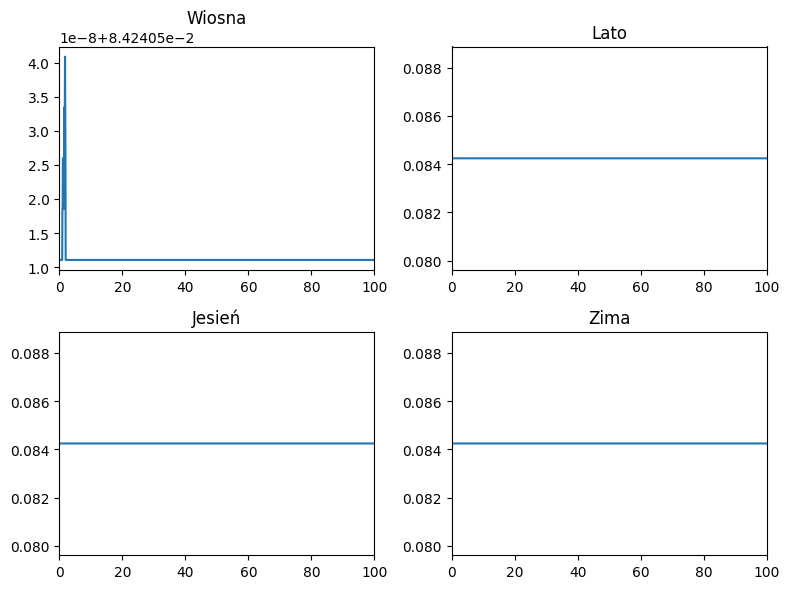

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))


axs[0,0].plot(flow_time_plot, flow_result_spring)
axs[0,0].set_title('Wiosna')
axs[0,0].set_xlim(0, 100)

axs[0,1].plot(flow_time_plot, flow_result_summer)
axs[0,1].set_title('Lato')
axs[0,1].set_xlim(0, 100)

axs[1,0].plot(flow_time_plot, flow_result_fall)
axs[1,0].set_title('Jesień')
axs[1,0].set_xlim(0, 100)

axs[1,1].plot(flow_time_plot, flow_result_winter)
axs[1,1].set_title('Zima')
axs[1,1].set_xlim(0, 100)

plt.tight_layout()

plt.show()